# Assign0: dense flow over an obstacle

For this assignment you will run and plot some data from a Veros simulation.  Once you have the model running, please answer the questions below, and hand your Notebook in using Brightspace.

## Run the model

The model setup file to use is [./hydraulic.py](./hydraulic.py).  If you have {ref}`set up veros <run_veros>` on your machine and you have activated the environment (`mamba activate eos431`) then you should be able to do:

```
veros run --force-overwrite hydraulic.py
```

or, if you managed to get `mpi` to install and your computer has at least 4 cores:

```
mpirun -np 4 veros run --force-overwrite hydraulic.py -n 1 4
```

You should see output scroll by like:

```
 Current iteration: 2     (0.00/2.50d |  0.0% | 6.14d/(model year) | 1.0h left)
 Current iteration: 3     (0.00/2.50d |  0.0% | 4.49d/(model year) | 44.9m left)
 Current iteration: 4     (0.00/2.50d |  0.0% | 3.67d/(model year) | 36.7m left)
 Current iteration: 5     (0.00/2.50d |  0.0% | 3.13d/(model year) | 31.3m left)
```

interspersed with snapshots being written to the netcdf file:

```
 Current iteration: 358   (0.08/2.50d |  3.3% | 1.00d/(model year) | 9.7m left)
 Current iteration: 359   (0.08/2.50d |  3.3% | 1.00d/(model year) | 9.7m left)
 Writing snapshot at 2.00 hours
 Current iteration: 360   (0.08/2.50d |  3.3% | 1.01d/(model year) | 9.7m left)
 Current iteration: 361   (0.08/2.50d |  3.3% | 1.01d/(model year) | 9.7m left)
```

A file `hydraulic.snapshot.nc` should be increasing in size while you run this.  

Note that depending on the speed of your computer this could take a little while to run - after the first 20 iterations, the "time left" indication should be relatively accurate.

```{note}
Help! my model doesn't run, or is so painfully slow I can't wait for it to complete!  Please contact the instructor, preferably on Brightspace
```

## Q1.1

Make a plot of the evolution of the flow (u) over time, for at least 2 days (no need to show every time step).  Ideally, contour temperature as well as color velocity.  Please take some care to center your colormaps, and label the axes properly (though if the axes limits are repeated, you need not label _all_ the axes).  Also use some discretion in choosing the xlimits of your plot.  

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# use the matplotlib widget
%matplotlib widget

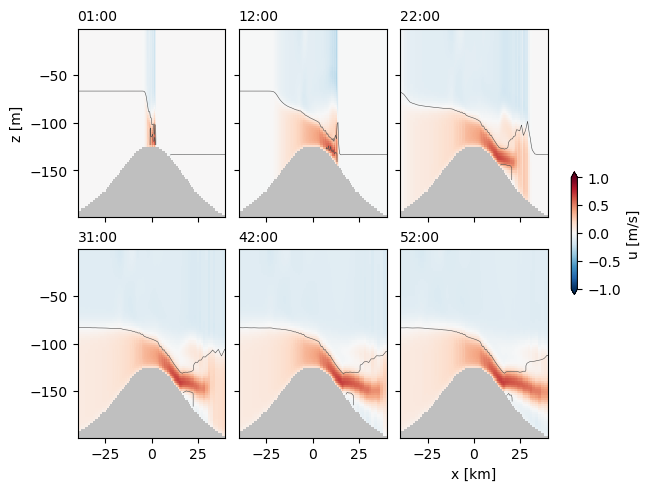

In [2]:

with xr.open_dataset('hydraulic.snapshot.nc') as ds0:
    fig, axs = plt.subplots(2, 3, layout='constrained', sharex=True, sharey=True)
    for nn, time in enumerate(range(0, 30, 5)):
        ds = ds0.isel(Time=time, yt=1, yu=1)
        ax = axs.flat[nn]
        ax.set_facecolor('0.75')
        pc = ax.pcolormesh(ds.xt, ds.zt, ds.u[1:,1:], clim=[-1, 1], cmap='RdBu_r')
        ax.contour(ds.xt, ds.zt, ds.temp, levels=[10-0.1, 12, 14.1], colors='0.3', linewidths=0.4)
        ax.set_xlim(-40, 40)
        hour = ds.Time / np.timedelta64(1, 'h')
        ax.set_title(f'{int(hour):02d}:00', loc='left', fontsize='medium')
    fig.colorbar(pc, shrink=0.3, extend='both', ax=axs, label='u [m/s]')
    axs[0, 0].set_ylabel('z [m]')
    axs[1, 2].set_xlabel('x [km]')

## Q1.2 Describe:

Describe the flow that is shown in your plot.  

- the water is moving.  Why?  
- why do you think the shallow layer of water is moving in the negative x direction?
- we often discuss flows being in "steady state". Does this flow acheive steady state?  If so, where?  
- the water flowing in the bottom layer clearly accelerates.  Do you think it transports more water?  

### Answer

Why is water moving? The water on the left side of obstacle is denser, so there is a pressure gradient force from left to right, pushing the water over the obstacle.  The water pours down like a waterfall to meet the downstream pool of water.

The shallow layer moves to the left to replace the dense water moving to the right. 

Steady state is achieved as waves propagating to the left and right propagate away from the obstacle.  There isn't one speed associated with this and some of the details setup only after more than 31 hours.   After this point much of the flow left of 25 km are in steady state, though there is still unsteadiness further downstream.  

Does the transport change in the lower layer: Consider at -25 km, the flow is about -0.15 m/s and is about 90 m so the transport of water (per width into page) is 13.5 m^2/s.  Consider at 12.5 km, the speed is closer to 0.6 m/s, and the layer is 20 m thick, so 12 m^2/s.  This is pretty close, indicating that the transport doesn't change significantly.  

## Q1.3 Hovmoller diagram:

If you did the above properly, you selected a given Time for each frame.  This time choose a certain depth, and plot the velocity as function of `xu` on the x axis and `Time` on the y axis.  This is called a [Hovmoller diagram](https://en.wikipedia.org/wiki/Hovmöller_diagram) and is a very useful way to see signals propagating.  Do a couple of interesting depths.

```{note} 
Time in Veros is stored as `np.timedelta64` which is time since the model run started in nanoseconds.  Matplotlib doesn't plot this very well, but does a nice job with datetimes, so suggest converting to datetime64 by adding an arbitrary starting date: `ds['Time'] = ds.Time + np.datetime64('2023-01-01')` 
```

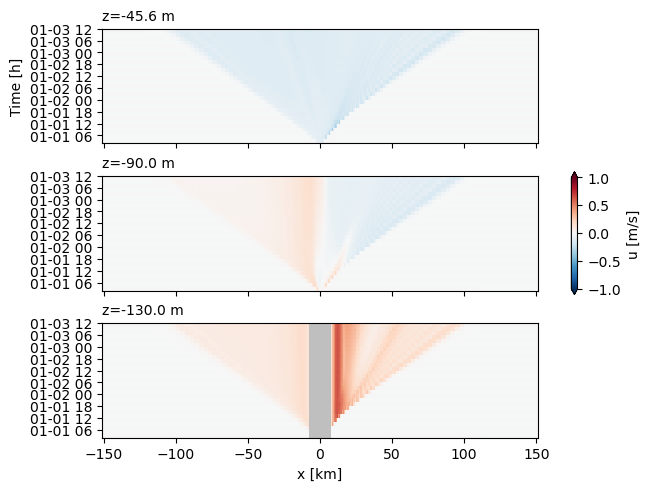

In [3]:
with xr.open_dataset('hydraulic.snapshot.nc') as ds0:
    # Veros uses timedeltas64 as the time axis.  Matplotlib doesn't deal with this very well
    # so convert to a date relative to an arbitrary day:
    ds0['Time'] = ds0.Time + np.datetime64('2023-01-01')
    
    fig, axs = plt.subplots(3, 1, layout='constrained', sharex=True, sharey=True)
    for nn, zz in enumerate([-45, -90, -130]):
        ds = ds0.isel(yt=1, yu=1).sel(zt=zz, method='nearest')
        ax = axs.flat[nn]
        ax.set_facecolor('0.75')
        pc = ax.pcolormesh(ds.xt, ds.Time , ds.u[:-1, :-1], clim=[-1, 1], cmap='RdBu_r')
        ax.set_title(f'z={ds.zt.values:1.1f} m', loc='left', fontsize='medium')
    fig.colorbar(pc, shrink=0.3, extend='both', ax=axs, label='u [m/s]')
    axs[0].set_ylabel('Time [h]')
    axs[2].set_xlabel('x [km]')

## Q1.4 Describe

Describe the signals seen in the Hovmoller diagram - refer to the time slice plots to help orient yourself.


### Answer

There is a pretty clear maximum propagation speed of the signal due to the collapse of the initial condition - it goes at about 100 km / 60 h = 0.46 m/s.  After the signal passes the response is approximately constant with time on the upstream side.  The downstream side has two signals propagating away - there is a leading edge and a slower wave that follows (this is a higher-mode response). 